# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [1]:
from sklearn.datasets import load_iris, load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [2]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [3]:
iris = load_iris()

#### KNN

##### 붓꽃 데이터

In [5]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = .5, max_features = .5)

In [8]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.00136566162109375 (+/- 0.00045243135283109425)
avg score time : 0.0019587039947509765 (+/- 0.0005137854462840228)
avg test score : 0.96 (+/- 0.024944382578492935)


In [9]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.02640562057495117 (+/- 0.002741846123378792)
avg score time : 0.00955805778503418 (+/- 0.0010427090127666258)
avg test score : 0.9533333333333334 (+/- 0.016329931618554516)


#### SVC

##### 붓꽃 데이터

In [10]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)
bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = .5, max_features = .5)

In [11]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.08398985862731934 (+/- 0.16519208975083358)
avg score time : 0.0012030601501464844 (+/- 0.0003916348954898944)
avg test score : 0.9666666666666666 (+/- 0.02108185106778919)


In [12]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.027625036239624024 (+/- 0.0020858909560909186)
avg score time : 0.0035983562469482423 (+/- 0.00046468534850049295)
avg test score : 0.9333333333333332 (+/- 0.059628479399994376)


#### Decision Tree

##### 붓꽃 데이터

In [13]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators = 10, max_samples = .5, max_features = .5)

In [14]:
cross_val = cross_validate(
    estimator = base_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.003242206573486328 (+/- 0.0024108688636234644)
avg score time : 0.0008533000946044922 (+/- 0.0012551710525063905)
avg test score : 0.9600000000000002 (+/- 0.03265986323710903)


In [15]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.03141918182373047 (+/- 0.0019471927829709922)
avg score time : 0.003197383880615234 (+/- 0.0016048941421089118)
avg test score : 0.9466666666666667 (+/- 0.039999999999999994)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [16]:
boston = load_boston()

#### KNN

##### 보스턴 주택 가격 데이터

In [22]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators = 10, max_samples = .5, max_features = .5)

In [23]:
cross_val = cross_validate(
    estimator = base_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.002409696578979492 (+/- 0.0011784643380635302)
avg score time : 0.0016866683959960937 (+/- 0.00040054022129394867)
avg test score : 0.47357748833823543 (+/- 0.13243123464477455)


In [24]:
cross_val = cross_validate(
    estimator = bagging_model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.027506589889526367 (+/- 0.0032694733532542854)
avg score time : 0.012023305892944336 (+/- 0.0030399382091913316)
avg test score : 0.45561763075319694 (+/- 0.08838984524052013)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [25]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor

### Random Forests 분류

In [26]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [27]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.15959362983703612 (+/- 0.004110586199720352)
avg score time : 0.012218999862670898 (+/- 0.0019724071572604796)
avg test score : 0.9666666666666668 (+/- 0.02108185106778919)


### Random Forests 회귀

In [28]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [29]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.35569396018981936 (+/- 0.024071237627988497)
avg score time : 0.012205076217651368 (+/- 0.004062319654044377)
avg test score : 0.6229272094841001 (+/- 0.20255937616861847)


### Extremely Randomized Trees 분류

In [30]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [31]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.12163610458374023 (+/- 0.012138528357852334)
avg score time : 0.013487625122070312 (+/- 0.0040110439440935435)
avg test score : 0.9466666666666667 (+/- 0.039999999999999994)


### Extremely Randomized Trees 회귀

In [32]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [33]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.23821210861206055 (+/- 0.011520927575139894)
avg score time : 0.012763023376464844 (+/- 0.0021952693958088025)
avg test score : 0.6133179999153681 (+/- 0.2707054473218741)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [75]:
n_classes = 3
n_estimators = 30
plot_step = .02
plot_step_coarser = .5
RANDOM_SEED = 13

In [63]:
plot_idx = 1
models = [DecisionTreeClassifier(max_depth = None),
          RandomForestClassifier(n_estimators = n_estimators),
          ExtraTreesClassifier(n_estimators = n_estimators)]

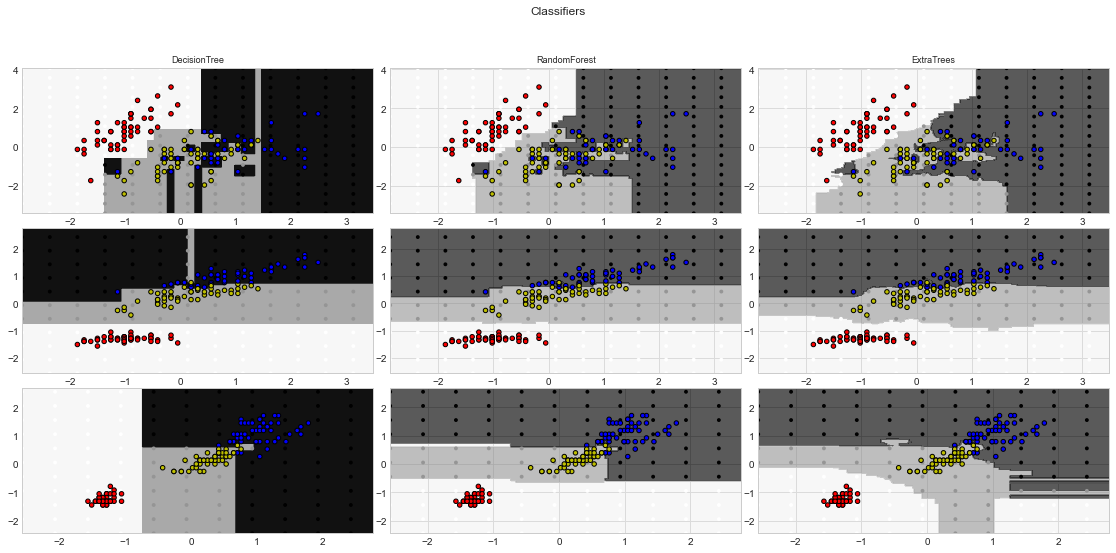

In [65]:
plt.figure(figsize = (16, 8))

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models :
        X = iris.data[:, pair]
        y = iris.target
        
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        mean = X.mean(axis = 0)
        std = X.std(axis = 0)
        X = (X - mean) / std
        model.fit(X, y)
        
        model_title = str(type(model)).split('.')[-1][:-2][:-len('Classifier')]
        
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize = 9)
            
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z)
        else :
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_ :
                Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha = estimator_alpha)
                
        xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                             np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                               yy_coarser.ravel()]).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s = 15,
                                c = Z_points_coarser, edgecolor = 'none')
        plt.scatter(X[:, 0], X[:, 1], c = y,
                    cmap = ListedColormap(['r', 'y', 'b']),
                    edgecolor = 'k', s =20)
        plot_idx += 1
plt.suptitle('Classifiers', fontsize = 12)
plt.axis('tight')
plt.tight_layout(h_pad = .2, w_pad = .2, pad = 2.5)
plt.show()

In [79]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth = None),
         RandomForestRegressor(n_estimators = n_estimators),
         ExtraTreesRegressor(n_estimators = n_estimators)]

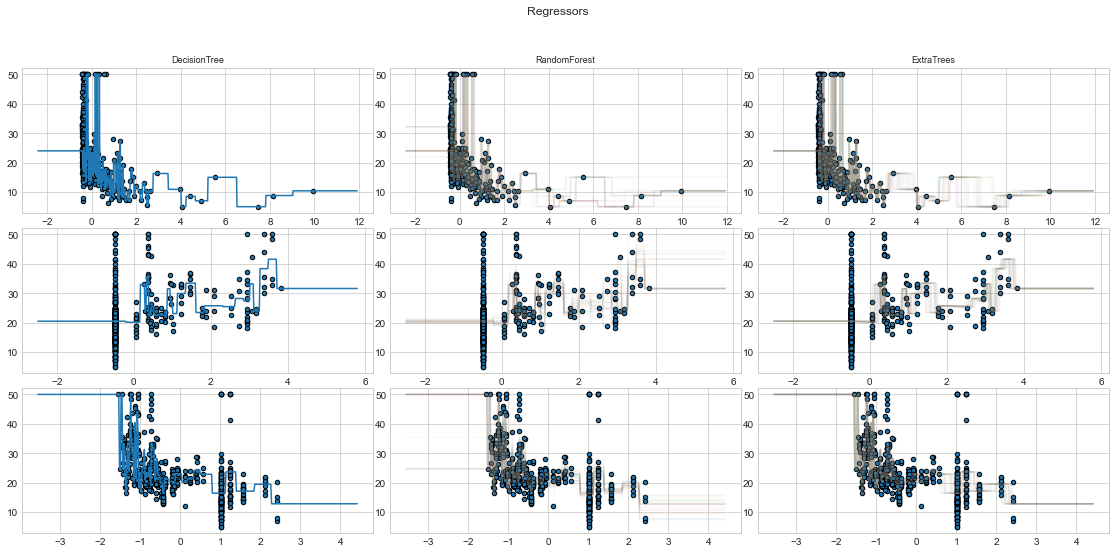

In [80]:
plt.figure(figsize = (16, 8))

for pair in (0, 1, 2):
    for model in models:
        X = boston.data[:, pair]
        y = boston.target
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]
        
        mean = X.mean(axis = 0)
        std = X.std(axis = 0)
        X = (X - mean) / std
        
        model.fit(X.reshape(-1, 1), y)
        
        model_title = str(type(model)).split('.')[-1][:-2][:-len('Regressor')]
        plt.subplot(3, 3, plot_idx)
        if plot_idx <= len(models):
            plt.title(model_title, fontsize = 9)
        
        x_min, x_max = X.min() - 1, X.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.arange(x_min - 1, x_max + 1, plot_step), np.arange(y_min - 1, y_max + 1, plot_step)
        
        if isinstance(model, DecisionTreeRegressor):
            Z = model.predict(xx.reshape(-1, 1))
            cs = plt.plot(xx, Z)
        else :
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(xx.reshape(-1, 1))
                cs = plt.plot(xx, Z, alpha = estimator_alpha)
        plt.scatter(X, y, edgecolors = 'k', s = 20)
        plot_idx += 1
        
plt.suptitle('Regressors', fontsize = 12)
plt.axis('tight')
plt.tight_layout(h_pad = .2, w_pad = .2, pad = 2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [81]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

### AdaBoost 분류

In [82]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [83]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.2591991901397705 (+/- 0.15591832488109383)
avg score time : 0.020477819442749023 (+/- 0.0033974876282574316)
avg test score : 0.9466666666666667 (+/- 0.03399346342395189)


### AdaBoost 회귀

In [84]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [85]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.31209454536437986 (+/- 0.12568330079289827)
avg score time : 0.013002395629882812 (+/- 0.004402419005523641)
avg test score : 0.5900826390062545 (+/- 0.2275818294433818)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [86]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [87]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [88]:
cross_val = cross_validate(
    estimator = model,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.5832518577575684 (+/- 0.05837594823221954)
avg score time : 0.004297447204589844 (+/- 0.004936288412754937)
avg test score : 0.9666666666666668 (+/- 0.02108185106778919)


### Gradient Tree Boosting 회귀

In [89]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [90]:
cross_val = cross_validate(
    estimator = model,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.25729217529296877 (+/- 0.044549062312209314)
avg score time : 0.0018983840942382812 (+/- 0.0021961893609801593)
avg test score : 0.6780274967675975 (+/- 0.15435295839603022)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [93]:
from sklearn.ensemble import VotingClassifier, VotingRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [95]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('SVC', model1), ('naive', model2), ('forest', model3)],
    voting = 'hard'
)

In [97]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv = 5)
    print('Accuracy : %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy : 0.97 (+/- 0.02) [SVC]
Accuracy : 0.95 (+/- 0.03) [GaussianNB]
Accuracy : 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy : 0.97 (+/- 0.02) [VotingClassifier]


In [99]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators = [('SVC', model1), ('naive', model2), ('forest', model3)],
    voting = 'soft',
    weights = [2, 1, 2]
)

In [100]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, iris.data, iris.target, cv = 5)
    print('Accuracy : %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

Accuracy : 0.97 (+/- 0.02) [SVC]
Accuracy : 0.95 (+/- 0.03) [GaussianNB]
Accuracy : 0.96 (+/- 0.02) [RandomForestClassifier]
Accuracy : 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [102]:
X = iris.data[:, [0, 2]]
y = iris.target

In [103]:
model1 = DecisionTreeClassifier(max_depth = 4)
model2 = KNeighborsClassifier(n_neighbors = 7)
model3 = SVC(gamma = .1, kernel = 'rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                              voting = 'soft')
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)


In [104]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

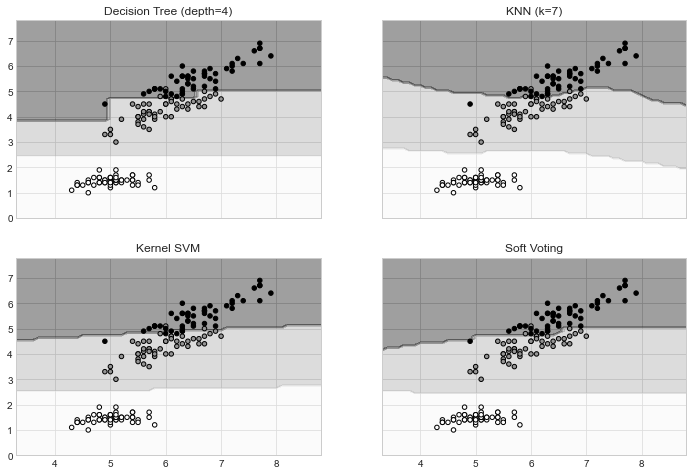

In [105]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize = (12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           'Kernel SVM', 'Soft Voting']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha = .4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c = y, s = 20, edgecolor = 'k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [109]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear', model1), ('gbr', model2), ('rfr', model3)]
)

In [110]:
for model in (model1, model2, model3, vote_model):
    model_name = str(type(model)).split('.')[-1][:-2]
    scores = cross_val_score(model, boston.data, boston.target, cv = 5)
    print('R2 : %0.2f (+/- %0.2f) [%s]' % (scores.mean(), scores.std(), model_name))

R2 : 0.35 (+/- 0.38) [LinearRegression]
R2 : 0.68 (+/- 0.15) [GradientBoostingRegressor]
R2 : 0.62 (+/- 0.20) [RandomForestRegressor]
R2 : 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

In [111]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [112]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators = [('linear', model1), ('gbr', model2), ('rfr', model3)]
)
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [113]:
x_min, x_max = X.min() - 1, X.max() + 1
xx = np.arange(x_min - 1, x_max + 1, .1)

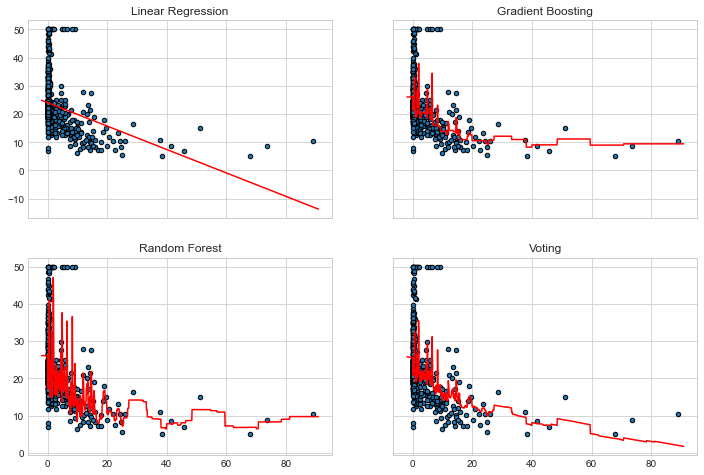

In [115]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize = (12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regression', 'Gradient Boosting', 'Random Forest', 'Voting']):
    Z = model.predict(xx.reshape(-1, 1))
    
    axarr[idx[0], idx[1]].plot(xx, Z, c= 'r')
    axarr[idx[0], idx[1]].scatter(X, y, s = 20, edgecolor = 'k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [116]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [117]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [118]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [119]:
cross_val = cross_validate(
    estimator = reg,
    X = boston.data, y = boston.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.3143942832946777 (+/- 0.05128748497369216)
avg score time : 0.01324167251586914 (+/- 0.004683103116364725)
avg test score : 0.3240695860040871 (+/- 0.3342630486593945)


#### 회귀식 시각화

In [120]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [122]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
)
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

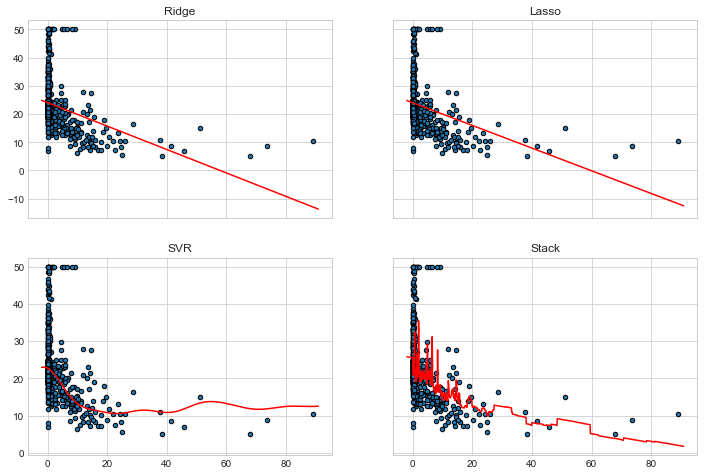

In [123]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize = (12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 'SVR', 'Stack']):
    Z = model.predict(xx.reshape(-1, 1))
    
    axarr[idx[0], idx[1]].plot(xx, Z, c= 'r')
    axarr[idx[0], idx[1]].scatter(X, y, s = 20, edgecolor = 'k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()

### 스택 분류

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [127]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
              ('svc', SVC()),
              ('naive', GaussianNB())]

In [132]:
clf = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

In [133]:
cross_val = cross_validate(
    estimator = clf,
    X = iris.data, y = iris.target,
    cv = 5
)
print('avg fit time : {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time : {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score : {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time : 0.9799609661102295 (+/- 0.21758282616199617)
avg score time : 0.03382687568664551 (+/- 0.005660764760041784)
avg test score : 0.9733333333333334 (+/- 0.02494438257849294)


#### 결정 경계 시각화

In [134]:
X = iris.data[:, [0, 2]]
y = iris.target

In [136]:
model1 = LogisticRegression(max_iter = 10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator=RandomForestClassifier()
)
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack= stack.fit(X, y)


In [137]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                     np.arange(y_min, y_max, .1))

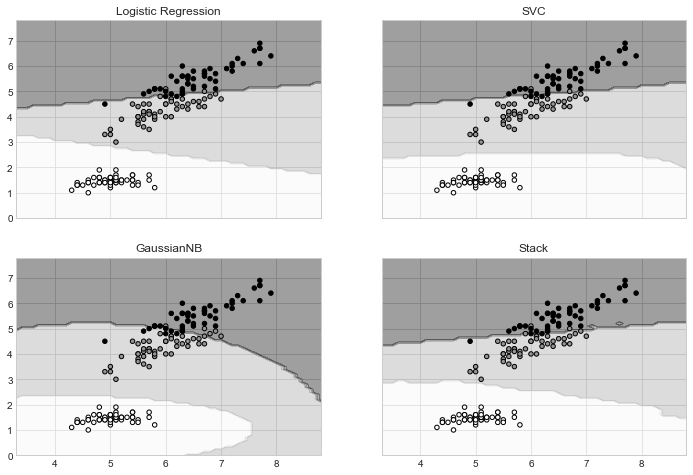

In [138]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey = 'row', figsize = (12, 8))

for idx, model, tt in zip(product([0, 1], [0, 1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC',
                           'GaussianNB', 'Stack']):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha = .4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c = y, s = 20, edgecolor = 'k')
    axarr[idx[0], idx[1]].set_title(tt)
    
plt.show()